<a href="https://colab.research.google.com/github/pupba/Learning/blob/main/%5B%EA%B3%BC%EC%A0%9C1%5D_2%EC%9E%A5_%EC%83%88%EB%A1%9C%EC%9A%B4_%EC%83%98%ED%94%8C_%EB%91%90_%EA%B0%9C_%EC%98%88%EC%B8%A1%EA%B3%BC_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%B3%80%ED%99%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 데이터 준비
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

import numpy as np
fish_data = np.column_stack((fish_length, fish_weight))
fish_target = np.concatenate((np.ones(35),np.zeros(14)))

In [ ]:
# 훈련 데이터, 검증 데이터 생성
from sklearn.model_selection import train_test_split
train_input,test_input,train_target,test_target = train_test_split(fish_data,fish_target,random_state=42)

In [ ]:
# 모델 훈련
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()

# 수상한 물고기 2마리
AnonyFishes = [[25, 150],[30,180]]

In [ ]:
def isBream(fish):
    print(f"{fish}은",end=" ")
    if kn.predict([fish]) == 1:
        print("도미 입니다.")
    else :
        print("빙어 입니다.")

In [ ]:
import matplotlib.pyplot as plt
def drawScatter(trainInput,fish,neighbors):
    plt.scatter(trainInput[:,0],trainInput[:,1]) # 학습 데이터 전체
    plt.scatter(fish[0],fish[1],marker="^") # 새로운 물고기
    plt.scatter(trainInput[neighbors,0],trainInput[neighbors,1],marker='D')
    plt.xlabel('length')
    plt.ylabel('weight')
    plt.show()

## 1. 표준점수로 변환하지 않은 경우
### 1-1. 새로운 샘플 두개의 예측 결과 출력
### 1-2. 새로운 샘플 두개의 이웃정보 얻기
### 1-3. [25,150] 샘플과 이웃들 시각화
### 1-4. [30,180] 샘플과 이웃들 시각화

In [ ]:
kn.fit(train_input,train_target)
print("모델 성능 :",kn.score(test_input,test_target)*100,end="% \n")

모델 성능 : 100.0% 


In [ ]:
# 1-1 예측 결과
for fish in AnonyFishes:
    isBream(fish)

[25, 150]은 빙어 입니다.
[30, 180]은 도미 입니다.


[25, 150]의 이웃
distances -->
 [[ 92.00086956 130.48375378 138.32150953 140.00603558 140.62090883]]
indexs -->
 [[12 29  5 19  4]]


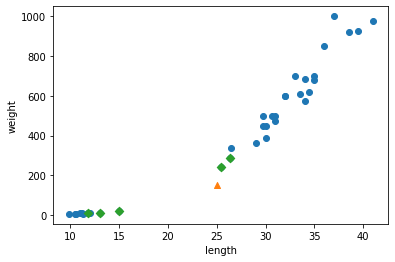




[30, 180]의 이웃
distances -->
 [[ 62.17041097 110.06220968 160.03827667 160.80115049 168.6589458 ]]
indexs -->
 [[12 19 21 29  5]]


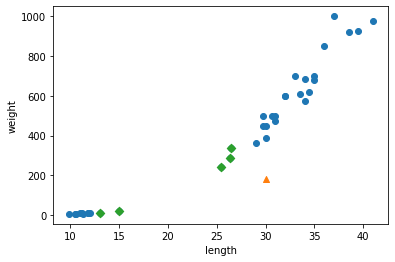

In [ ]:
# 1-2,3,4 이웃정보 얻기
for fish in AnonyFishes:
    print(f"{fish}의 이웃")
    distances, indexes = kn.kneighbors([fish])
    print("distances -->\n",distances)
    print("indexs -->\n",indexes)
    drawScatter(train_input,fish,indexes)
    print("\n\n")

## 2. 표준점수로 변환한 경우
### 2-1. 새로운 샘플 두개의 예측 결과
### 2-2. 새로운 샘플 두개의 이웃정보 얻기
### 2-3. [25,150] 샘플과 이웃들 시각화
### 2-4. [30,180] 샘플과 이웃들 시각화

In [ ]:
mean = np.mean(train_input,axis = 0)
std = np.std(train_input,axis = 0)

# 데이터 표준 데이터화
train_scaled = (train_input - mean) / std
test_scaled = (test_input-mean) / std
fishes_scaled=(AnonyFishes - mean) / std

In [ ]:
kn.fit(train_scaled,train_target)
print("모델 성능 :",kn.score(test_scaled,test_target)*100,end="% \n")

모델 성능 : 100.0% 


In [ ]:
def isBream_Scaled(fish):
    if kn.predict([fish]) == 1:
        print("도미 입니다.")
    else :
        print("빙어 입니다.")

In [ ]:
# 2-1 예측 결과
for idx,fish in enumerate(fishes_scaled):
    print(f"{AnonyFishes[idx]}은",end=" ")
    isBream_Scaled(fish)

[25, 150]은 도미 입니다.
[30, 180]은 도미 입니다.


[25, 150]의 이웃
distances -->
 [[0.28867034 0.45345741 0.60864646 0.76935617 0.89243065]]
indexs -->
 [[12 19 21  1 31]]


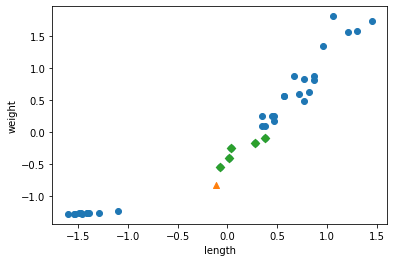




[30, 180]의 이웃
distances -->
 [[0.49000434 0.49823854 0.57725948 0.60406425 0.65282579]]
indexs -->
 [[12 19  1 21 31]]


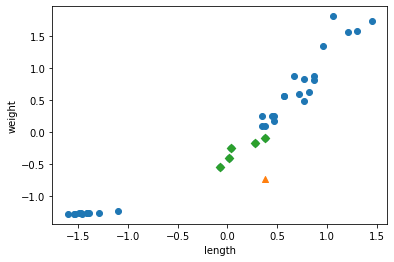

In [ ]:
# 2-2,3,4 이웃정보 얻기
for idx,fish in enumerate(fishes_scaled):
    print(f"{AnonyFishes[idx]}의 이웃")
    distances, indexes = kn.kneighbors([fish])
    print("distances -->\n",distances)
    print("indexs -->\n",indexes)
    drawScatter(train_scaled,fish,indexes)
    print("\n\n")